In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data_base = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_base

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
# Finding the ration of churners to non churners in the churn column
print("Labels in the output columns: ",data_base['Churn'].value_counts().index)
a = data_base['Churn'].value_counts().values
print("Non Churners %:",a[0]/(a[0]+a[1]))
print("Churners %:",a[1]/(a[0]+a[1]))

Labels in the output columns:  Index(['No', 'Yes'], dtype='object')
Non Churners %: 0.7346301292063041
Churners %: 0.2653698707936959


In [37]:
# Imbalanced data, chance of overfitting is more, accuracy is cursed
# We will use technique such as upsampling, downsampling to get rid of this problem

In [38]:
# We will now create a model, so that when a new or old customers come, it will tell whether the customer is going to churn or not

In [39]:
#EDA
# we have both categorical, Numerical data
# first thing we will do univariate analysis

In [40]:
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [41]:
print(data_base.shape)
data_base.columns.values

(7043, 21)


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [44]:
# Checking datatypes
data_base.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
# only for numerical types clumns
data_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


senior citizons columns is categorical thus 25,50,75 %ile is not a proper ditribution. 
75%ile customers have tenure less than 55 months. 
avg monthly charges is 64.762 whereas 25% customers pay more than 89.85% per month

In [46]:
data_base.info()
# nothing is null in this data, every field is filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# DATA Cleaning

In [48]:
data = data_base.copy()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# TotalCharges is a object type, which needed to be convert on float dtype
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce') # whenever there is an error 'coerce' will replace it with NaN

In [55]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
# 11 values are NaN in TotalCharges column
print(11/len(data)) # very less N/A Data
data.loc[data.TotalCharges.isnull()==True]

0.001561834445548772


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [60]:
# Dropping missing value rows
data.dropna(how='any',inplace=True)

In [62]:
data.shape # 11 records dropped

(7032, 21)

In [68]:
print(data['tenure'].max())
data['tenure'].value_counts().index # no. of months

72


Int64Index([ 1, 72,  2,  3,  4, 71,  5,  7,  8, 70,  9, 12, 10,  6, 13, 68, 11,
            15, 67, 18, 69, 24, 22, 66, 35, 17, 23, 16, 64, 56, 52, 26, 25, 61,
            14, 65, 60, 46, 19, 29, 27, 30, 63, 20, 53, 62, 41, 32, 50, 47, 51,
            54, 58, 49, 57, 31, 37, 42, 34, 43, 33, 55, 48, 40, 21, 45, 59, 38,
            28, 39, 44, 36],
           dtype='int64')

In [69]:
# we can create a new column for tenure groups as bins
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
data['tenure_group'] = pd.cut(data.tenure,range(1,80,12), right=False, labels=labels)

In [70]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [71]:
# dropping columns which are not useful
data.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [72]:
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


UNIVARIATE ANALYSIS

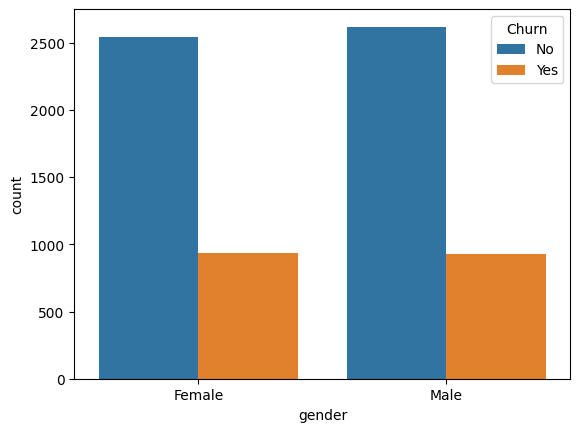

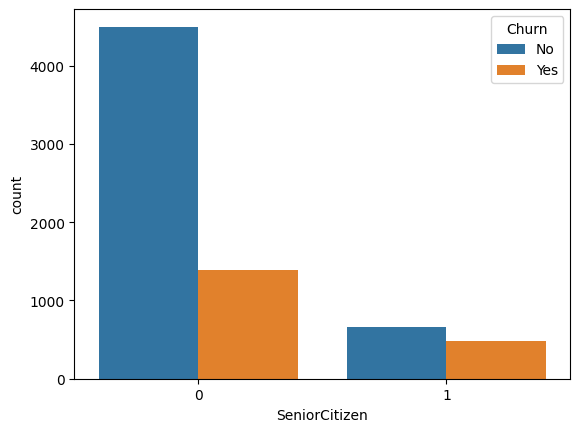

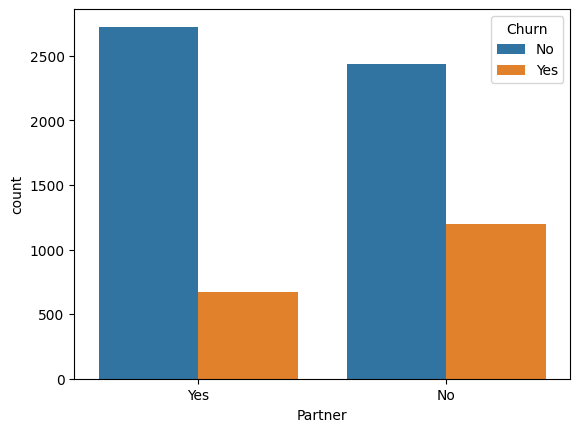

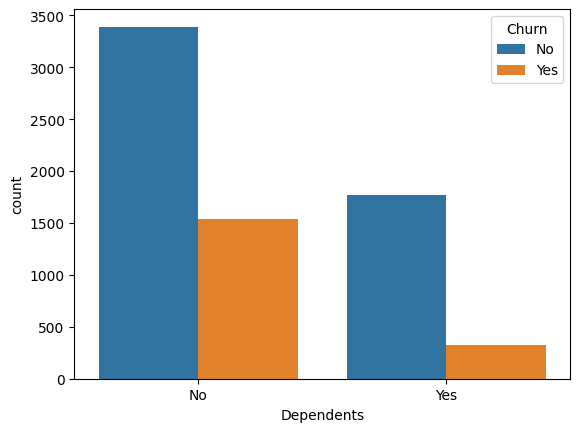

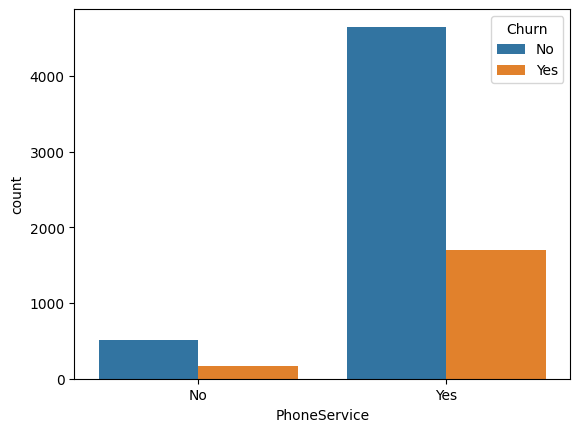

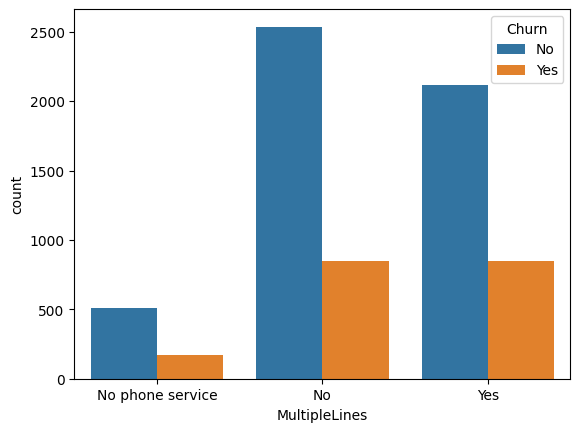

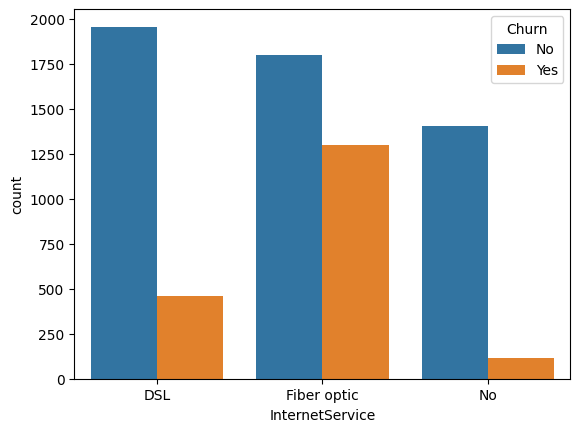

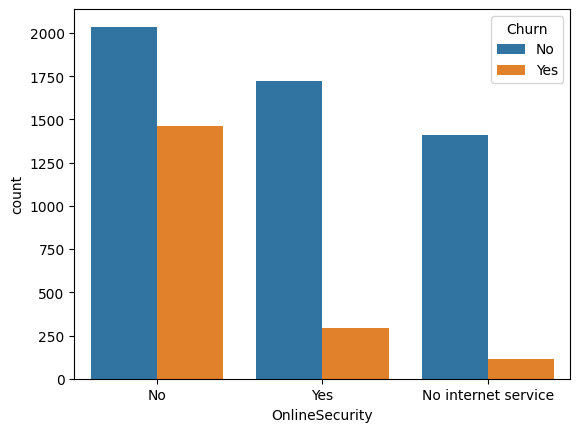

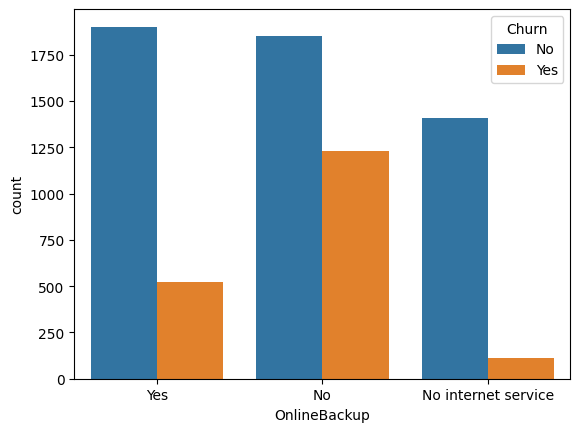

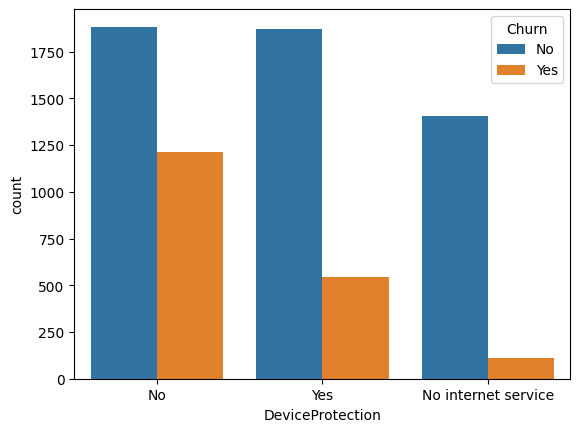

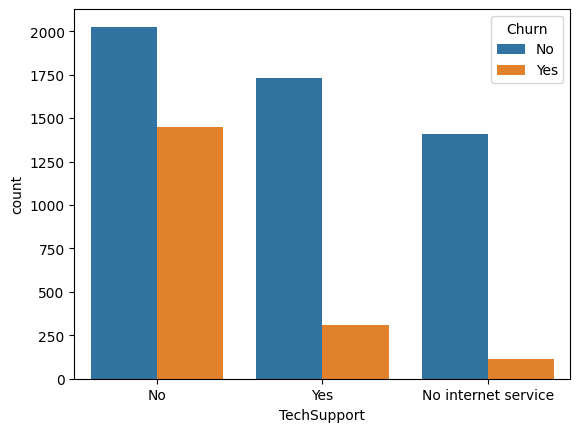

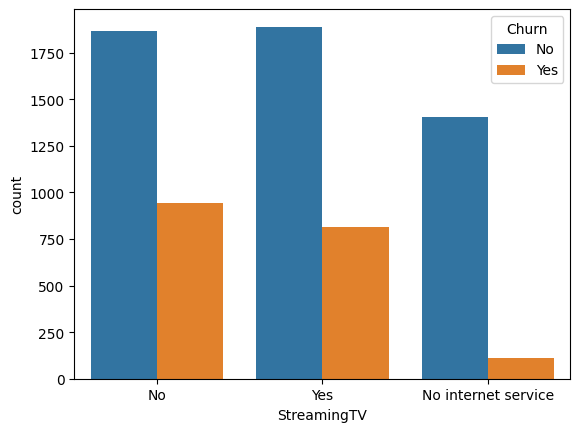

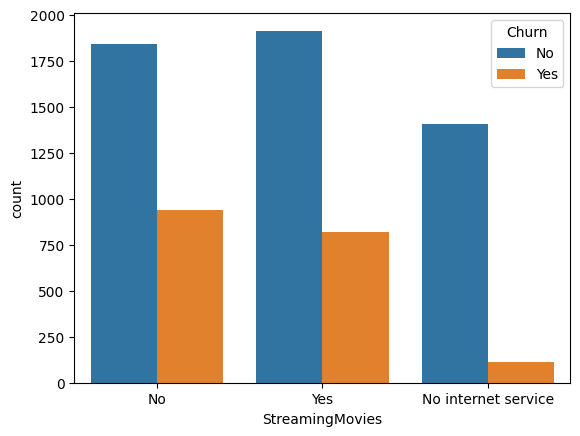

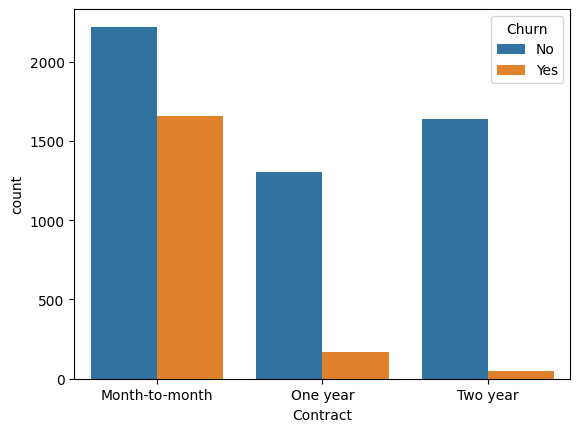

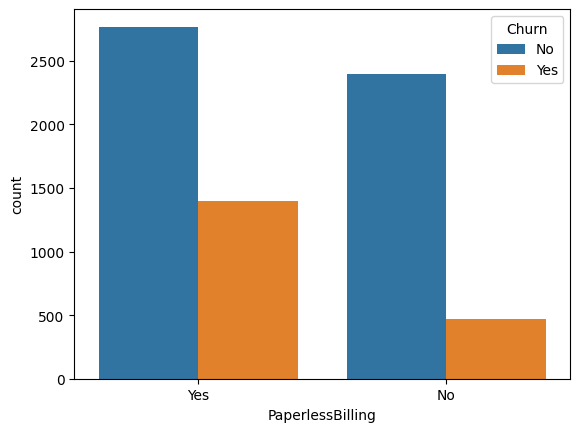

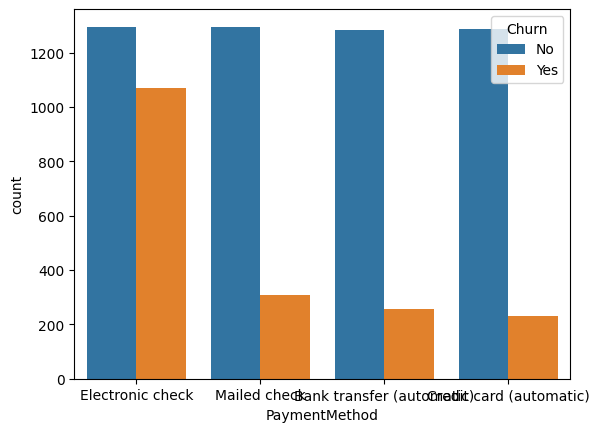

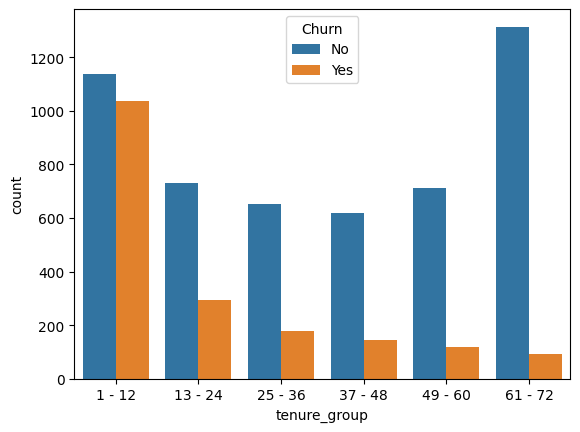

In [73]:
for i,pred in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data,x=pred,hue='Churn')

In [74]:
# Changing the Churn labels to numeric
data['Churn']=np.where(data.Churn=='Yes',1,0)

In [75]:
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


In [77]:
# converting the categorical values to dummy variables, but columns size increase which can make the computation a bit expensive
data_dummies = pd.get_dummies(data)
data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


0.6510648032262025


Text(0, 0.5, 'TotalCharges')

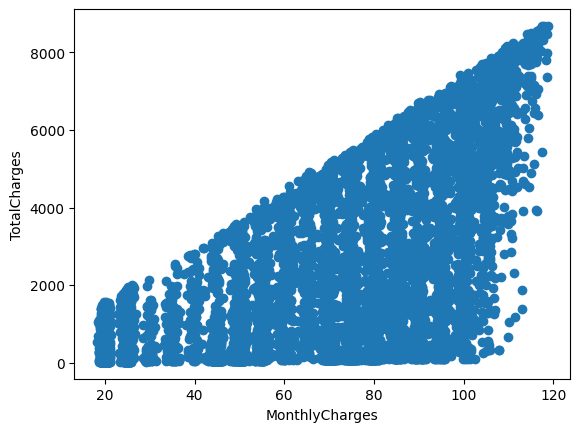

In [83]:
print(data_dummies['MonthlyCharges'].corr(data_dummies['TotalCharges']))
plt.scatter(data_dummies['MonthlyCharges'],data_dummies['TotalCharges'])
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
# TotalCharges and MonthlyCharges are very much dependent on each other

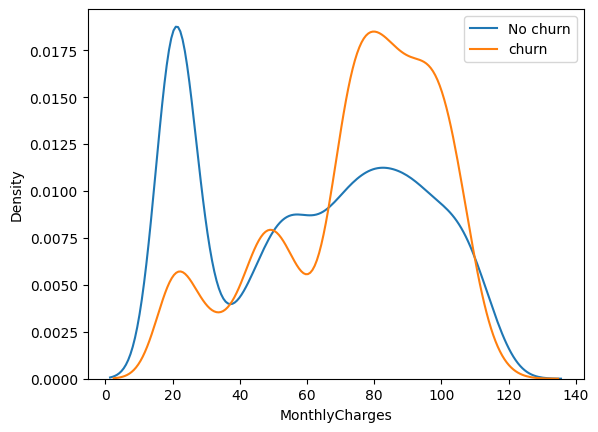

In [105]:
# Lets analyse using kdeplot, reference: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(data_dummies.MonthlyCharges[data_dummies['Churn']==0])
sns.kdeplot(data_dummies.MonthlyCharges[data_dummies['Churn']==1])
plt.legend(["No churn","churn"],loc='upper right')

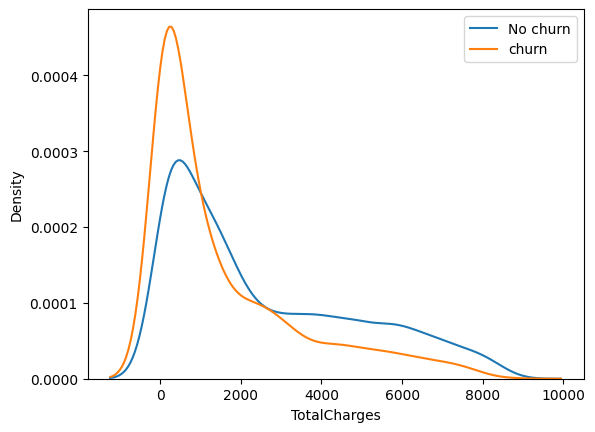

In [106]:
sns.kdeplot(data_dummies.TotalCharges[data_dummies['Churn']==0])
sns.kdeplot(data_dummies.TotalCharges[data_dummies['Churn']==1])
plt.legend(["No churn","churn"],loc='upper right')

In [116]:
corr_list = []
for i in range(len(data_dummies.columns)):
    corr_list.append([data_dummies.columns[i],data_dummies['Churn'].corr(data_dummies[data_dummies.columns[i]])])
x=[]
y=[]
for i in range(len(corr_list)):
    x.append(corr_list[i][0])
    y.append(corr_list[i][1])

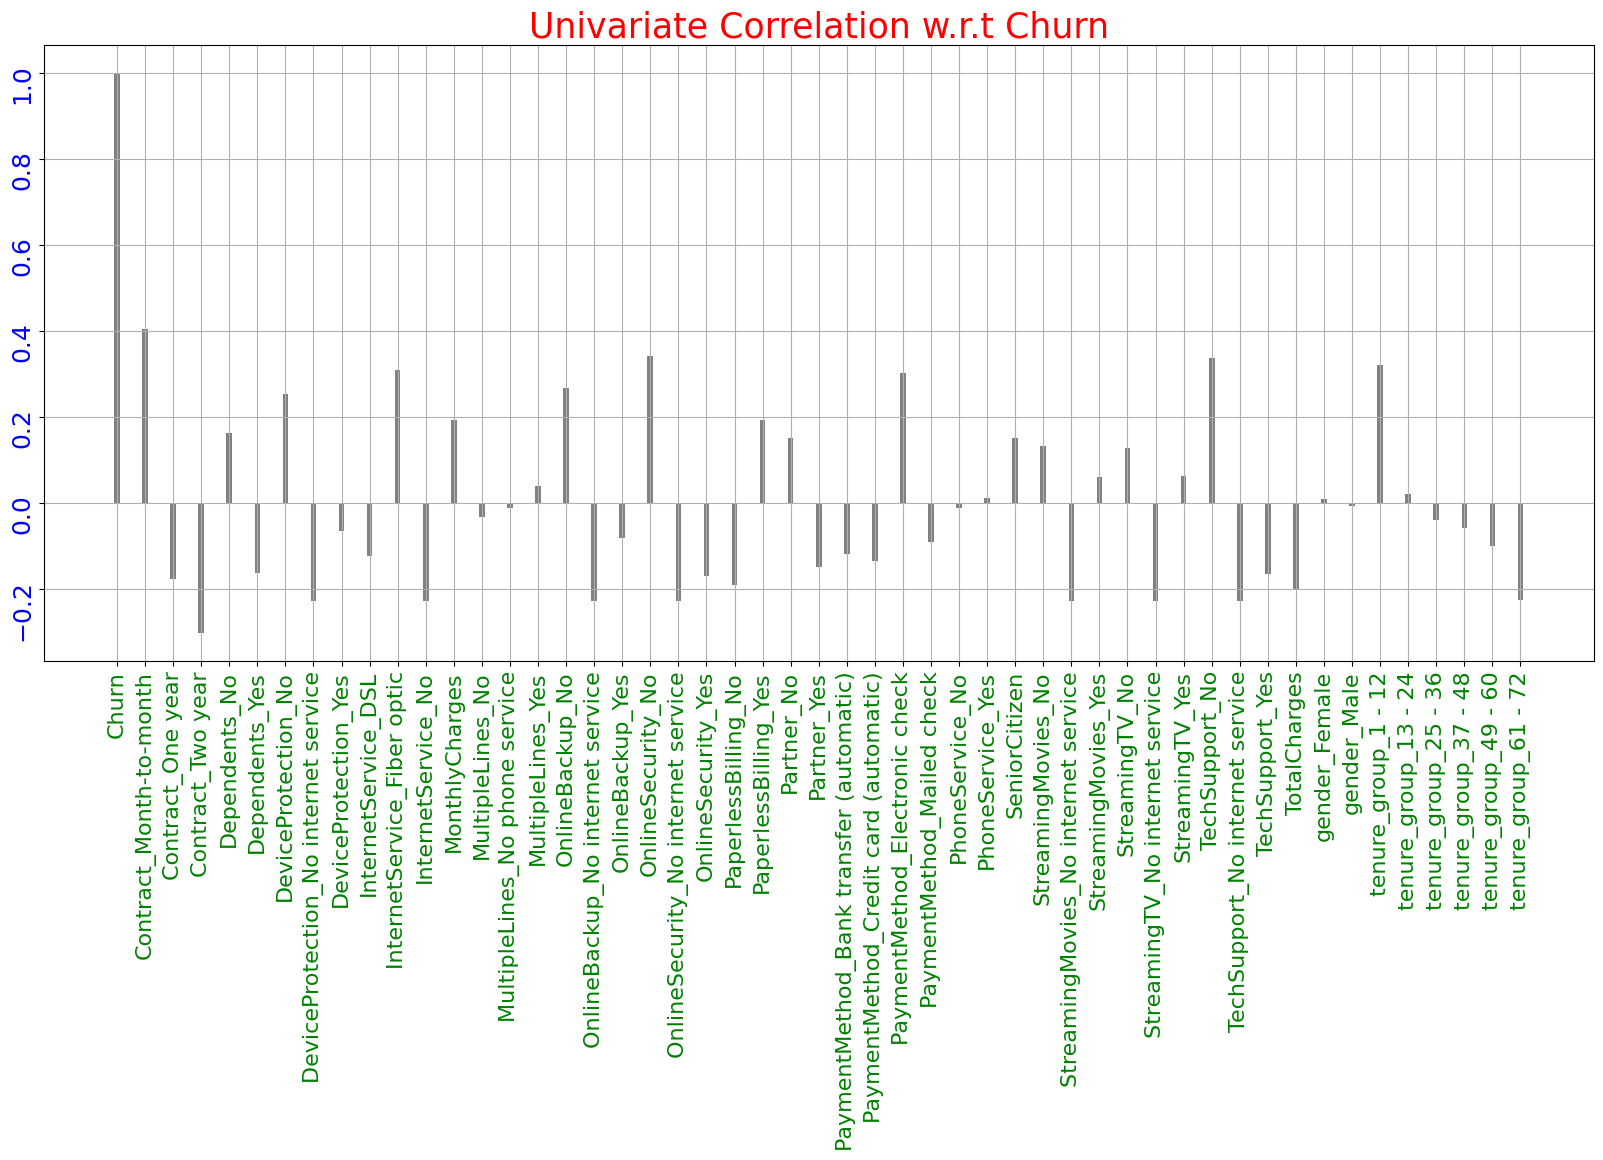

In [147]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90,fontsize=16,c='g')
plt.yticks(rotation = 90,fontsize=18,c='b')
plt.bar(x,y,color='grey',width=0.2)
plt.title("Univariate Correlation w.r.t Churn",fontsize=25,c='r')
plt.grid()
plt.show()

In [155]:
print("High Churn senn in :")
print("\n")
for i in range(len(x)):
    if(y[i]>=0.3):
        print(x[i])

High Churn senn in :


Churn
Contract_Month-to-month
InternetService_Fiber optic
OnlineSecurity_No
PaymentMethod_Electronic check
TechSupport_No
tenure_group_1 - 12


<AxesSubplot: >

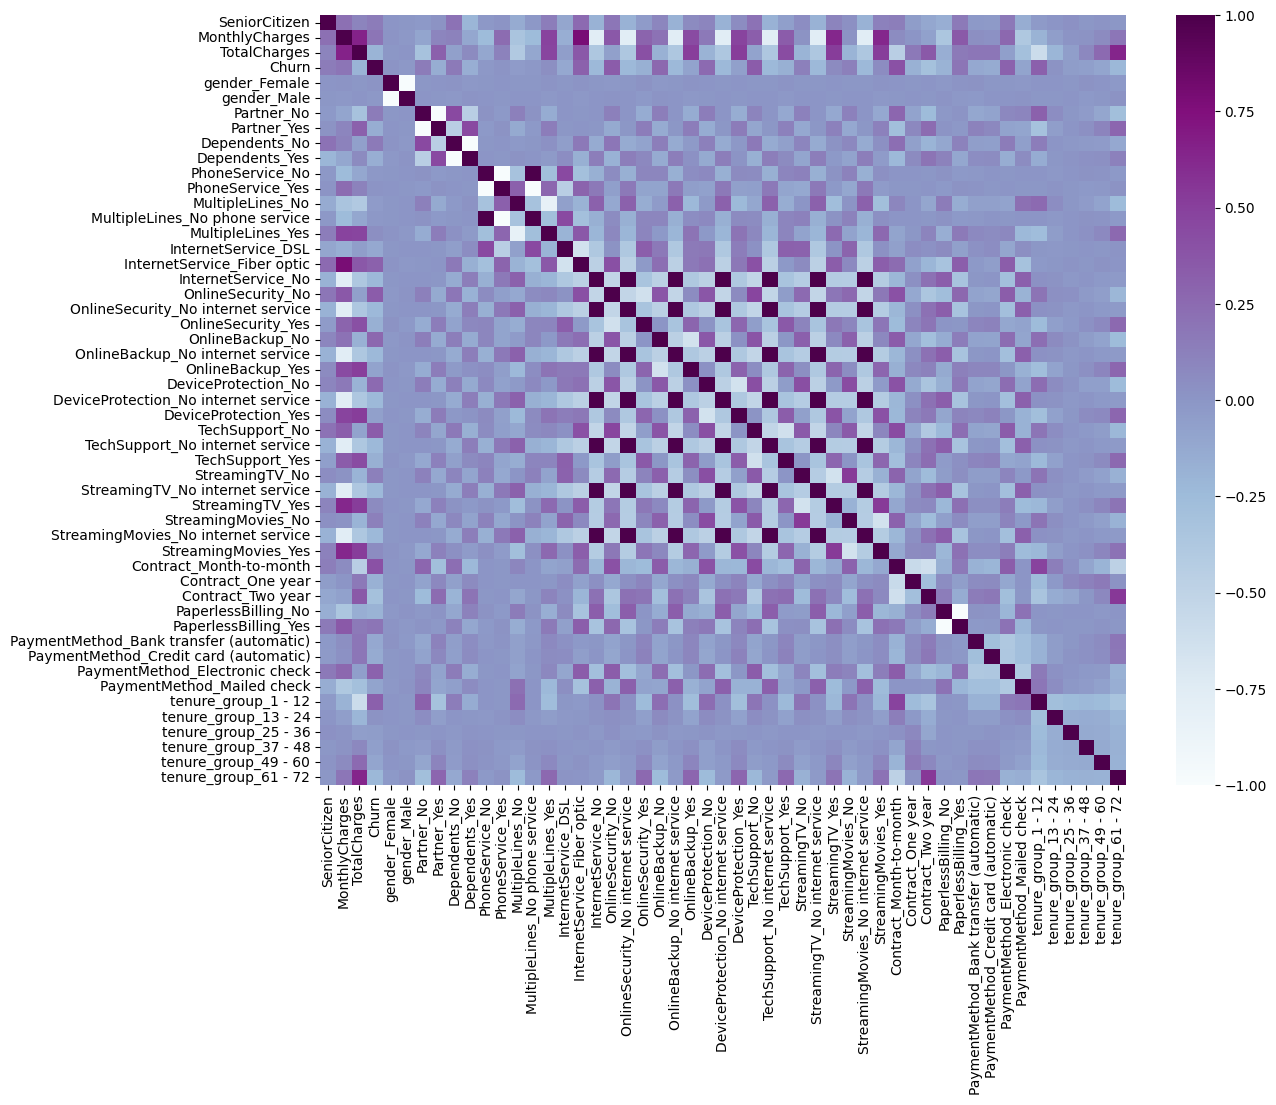

In [167]:
plt.figure(figsize=(13,10))
sns.heatmap(data_dummies.corr(),cmap='BuPu')

BIVARIATE ANALYSIS

In [168]:
data_churn0 = data[data.Churn==0]
data_churn1 = data[data.Churn==1]

In [170]:
for i,pred in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data,x=pred,hue='Churn')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1,1 - 12
7026,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1,1 - 12
7032,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,1 - 12
7034,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,61 - 72


Text(0.5, 1.0, 'Gender dist. for Non-Churned Cust.')

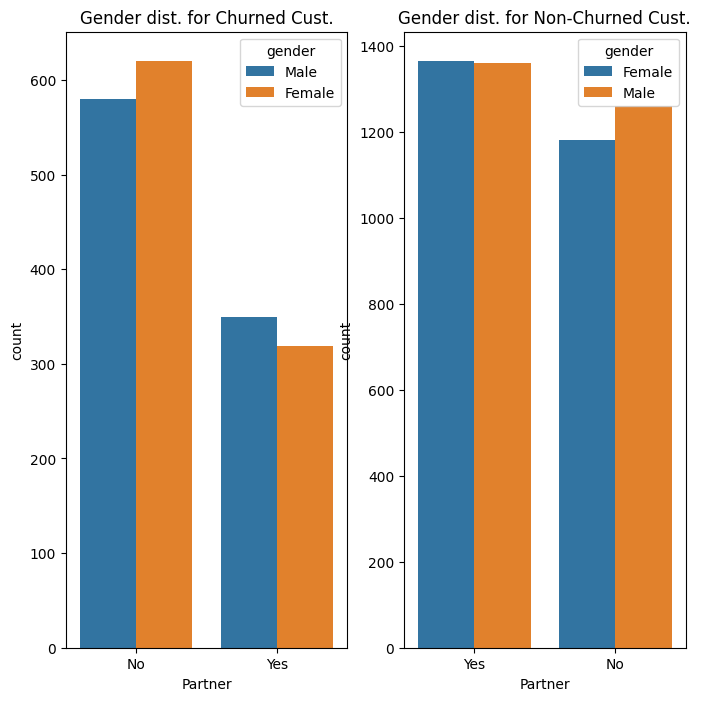

In [184]:
fig,axes = plt.subplots(figsize=(8,8),nrows=1,ncols=2)

sns.countplot(data_churn1,x='Partner',hue='gender',ax=axes[0])
axes[0].set_title('Gender dist. for Churned Cust.')

sns.countplot(data_churn0,x='Partner',hue='gender',ax=axes[1])
axes[1].set_title('Gender dist. for Non-Churned Cust.')

Text(0.5, 1.0, 'Contract dist. for Non-Churned Cust.')

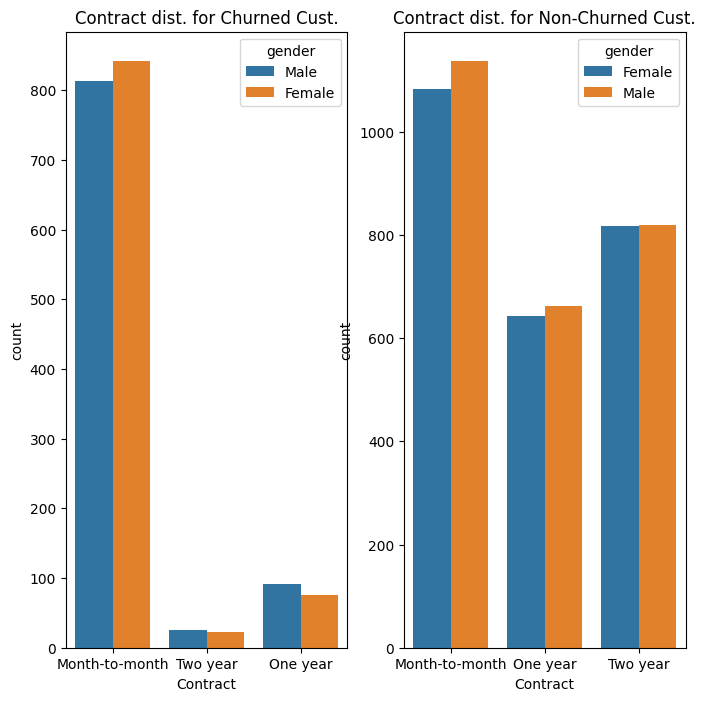

In [187]:
fig,axes = plt.subplots(figsize=(8,8),nrows=1,ncols=2)

sns.countplot(data_churn1,x='Contract',hue='gender',ax=axes[0])
axes[0].set_title('Contract dist. for Churned Cust.')

sns.countplot(data_churn0,x='Contract',hue='gender',ax=axes[1])
axes[1].set_title('Contract dist. for Non-Churned Cust.')

Text(0.5, 1.0, 'sen.citizen dist. for Non-Churned Cust.')

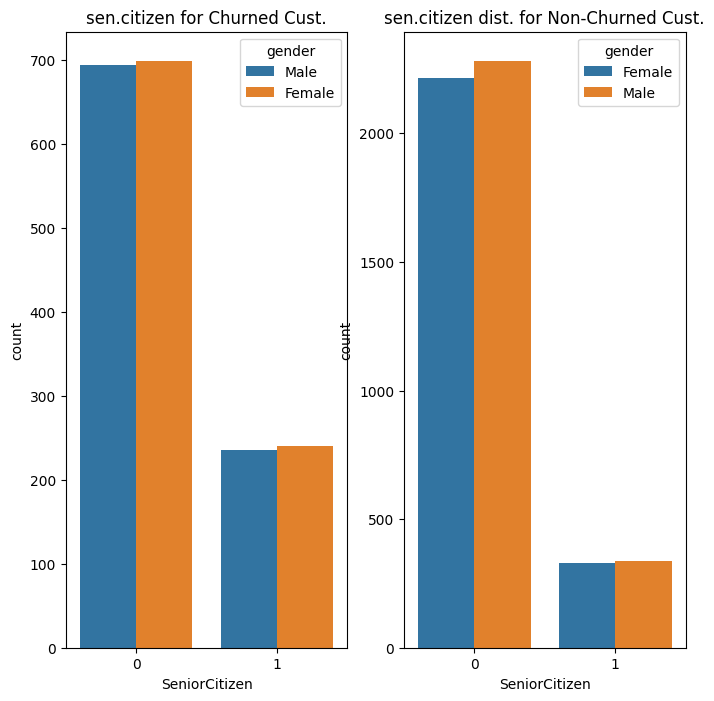

In [188]:
fig,axes = plt.subplots(figsize=(8,8),nrows=1,ncols=2)

sns.countplot(data_churn1,x='SeniorCitizen',hue='gender',ax=axes[0])
axes[0].set_title('sen.citizen for Churned Cust.')

sns.countplot(data_churn0,x='SeniorCitizen',hue='gender',ax=axes[1])
axes[1].set_title('sen.citizen dist. for Non-Churned Cust.')

Text(0.5, 1.0, 'Int-Service dist. for Non-Churned Cust.')

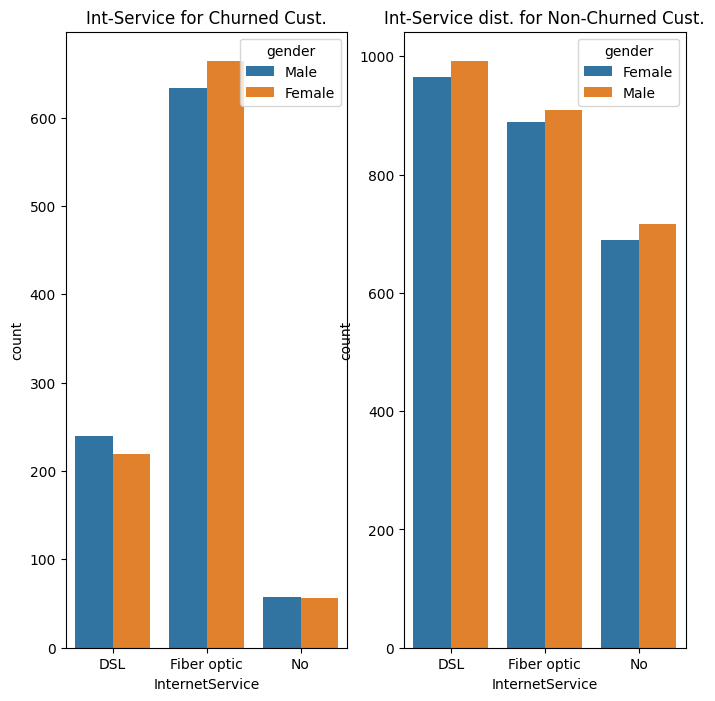

In [189]:
fig,axes = plt.subplots(figsize=(8,8),nrows=1,ncols=2)

sns.countplot(data_churn1,x='InternetService',hue='gender',ax=axes[0])
axes[0].set_title('Int-Service for Churned Cust.')

sns.countplot(data_churn0,x='InternetService',hue='gender',ax=axes[1])
axes[1].set_title('Int-Service dist. for Non-Churned Cust.')

Text(0.5, 1.0, 'Tech-support dist. for Non-Churned Cust.')

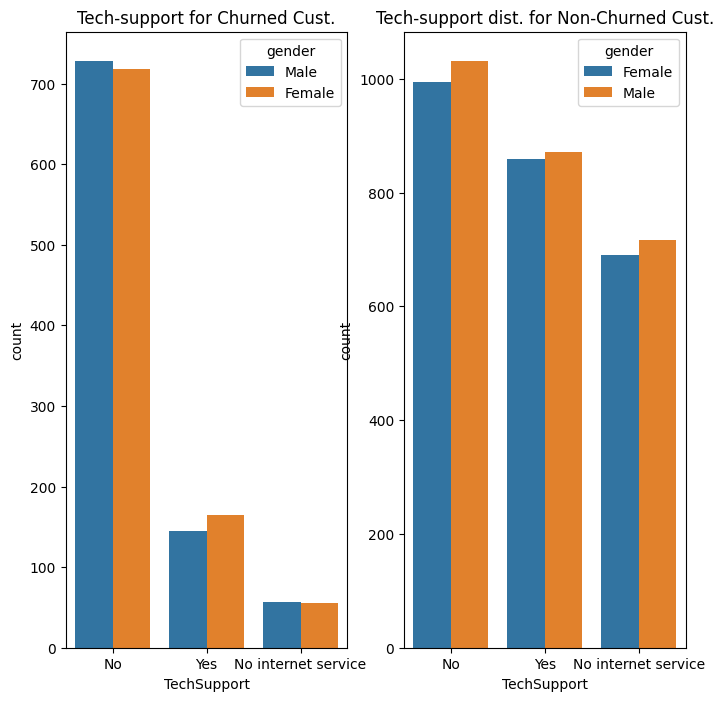

In [190]:
fig,axes = plt.subplots(figsize=(8,8),nrows=1,ncols=2)

sns.countplot(data_churn1,x='TechSupport',hue='gender',ax=axes[0])
axes[0].set_title('Tech-support for Churned Cust.')

sns.countplot(data_churn0,x='TechSupport',hue='gender',ax=axes[1])
axes[1].set_title('Tech-support dist. for Non-Churned Cust.')

In [191]:
data_dummies.to_csv('cust_churn_dummy_var.csv')

### Customer segmentation

### 1. Non-Churners

We Can Take all the dataset where output is not a churn and based on that data we will make clusters of customers to get a insight to improve the business so that churners can be turned into Non-Churners in future¶

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.drop(columns=['customerID'], axis=1, inplace=True)

In [5]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [8]:
df_non_churner = df[df.Churn=='No'] # Non-Churners

In [10]:
df_non_churner.shape

(5174, 20)

In [13]:
df_non_churner.TotalCharges = pd.to_numeric(df_non_churner.TotalCharges,errors='coerce')

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_23484\2566571580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_churner.TotalCharges = pd.to_numeric(df_non_churner.TotalCharges,errors='coerce')


In [14]:
df_non_churner.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df_non_churner.dropna(how='any',inplace=True)

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_23484\2838411954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_churner.dropna(how='any',inplace=True)


In [16]:
df_non_churner.shape

(5163, 20)

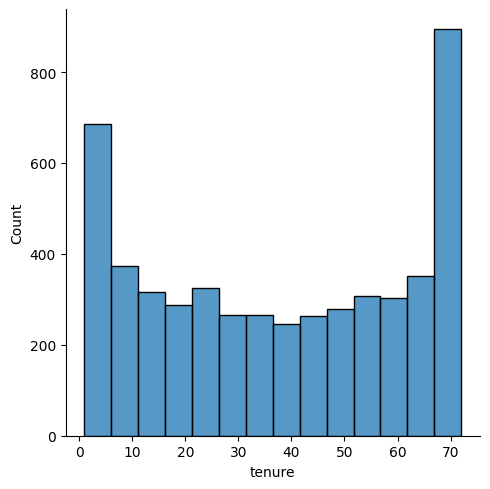

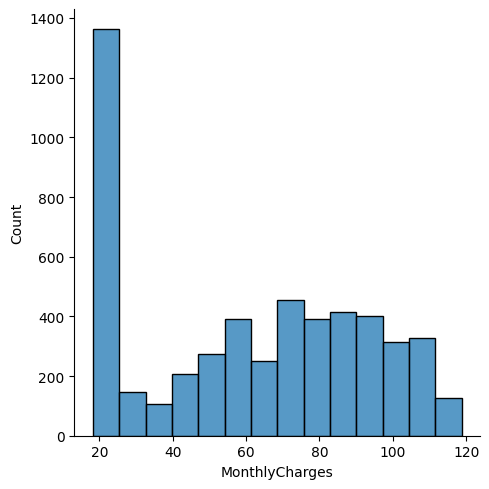

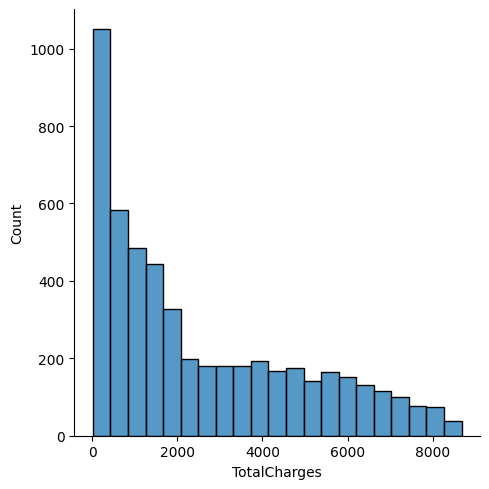

In [19]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
    sns.displot(df_non_churner[i])

<AxesSubplot: xlabel='count', ylabel='gender'>

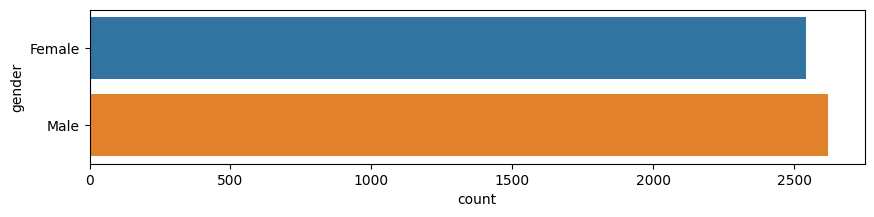

In [21]:
plt.figure(figsize=(10,2))
sns.countplot(y=df_non_churner.gender,data=df_non_churner)

In [23]:
df_non_churner.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5163.000000,5163.00000,5163.000000,5163.000000
mean,0.128995,37.65001,61.307408,2555.344141
std,0.335227,24.07694,31.094557,2329.456984
min,0.000000,1.00000,18.250000,18.800000
25%,0.000000,15.00000,25.100000,577.825000
50%,0.000000,38.00000,64.450000,1683.600000
75%,0.000000,61.00000,88.475000,4264.125000
max,1.000000,72.00000,118.750000,8672.450000


In [24]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df_non_churner['tenure_group'] = pd.cut(df_non_churner.tenure,range(1,80,12), right=False, labels=labels)
df_non_churner['tenure_group'].value_counts()

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_23484\3745174182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_churner['tenure_group'] = pd.cut(df_non_churner.tenure,range(1,80,12), right=False, labels=labels)


61 - 72    1314
1 - 12     1138
13 - 24     730
49 - 60     712
25 - 36     652
37 - 48     617
Name: tenure_group, dtype: int64

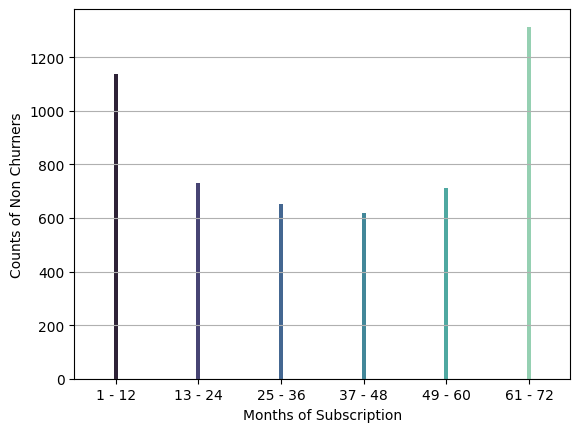

In [49]:
sns.barplot(x=df_non_churner['tenure_group'].value_counts().index,y=df_non_churner['tenure_group'].value_counts().values,palette='mako',width=0.05)
plt.xlabel('Months of Subscription')
plt.ylabel('Counts of Non Churners')
plt.grid(axis='y')
plt.show()

<AxesSubplot: >

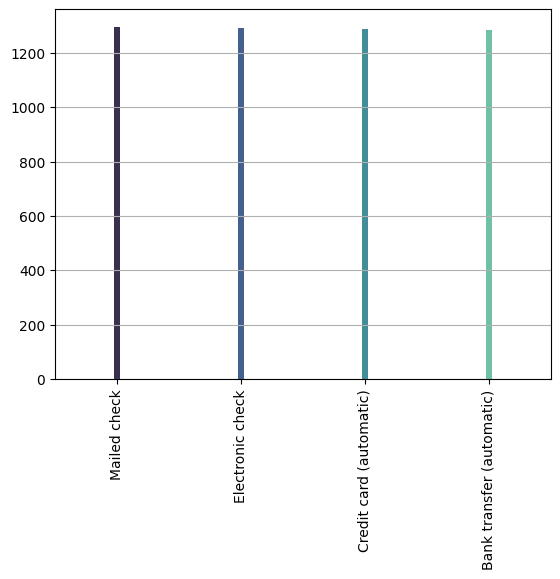

In [51]:
plt.xticks(rotation = 90)
plt.grid(axis='y')
sns.barplot(x=df_non_churner['PaymentMethod'].value_counts().index,y=df_non_churner['PaymentMethod'].value_counts().values,palette='mako',width=0.05)

In [38]:
df_non_churner['PaymentMethod'].value_counts()

Mailed check                 1296
Electronic check             1294
Credit card (automatic)      1289
Bank transfer (automatic)    1284
Name: PaymentMethod, dtype: int64

In [98]:
cluster_2d = df_non_churner.loc[:,['tenure','MonthlyCharges']].values

In [99]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(cluster_2d)
    wcss.append(kmeans.inertia_)

C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

Text(0, 0.5, 'wcss')

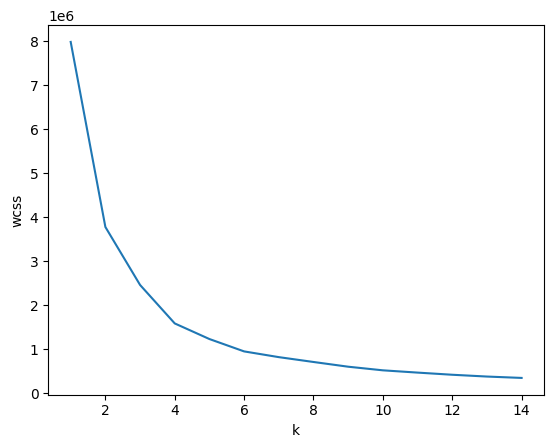

In [100]:
# Elbow graph
plt.plot(range(1,15),wcss)
plt.xlabel('k')
plt.ylabel('wcss')

In [114]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(cluster_2d)
print(label)

[0 2 3 ... 1 0 1]


C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
kmeans.cluster_centers_ #x,y points of centroids

array([[12.64089776, 27.61180382],
       [60.05740741, 92.75246914],
       [19.28943452, 74.8187872 ],
       [56.18674699, 32.62821285]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


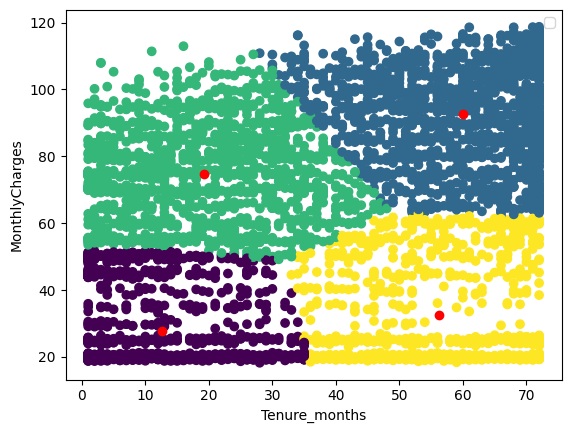

In [116]:
plt.scatter(cluster_2d[:,0],cluster_2d[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.xlabel('Tenure_months')
plt.ylabel('MonthlyCharges')
plt.legend()

### Churners Segmentation

In [118]:
df_churner = df[df.Churn=='Yes'] # Churners

In [119]:
df_churner.shape

(1869, 20)

In [120]:
df_churner.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: xlabel='count', ylabel='gender'>

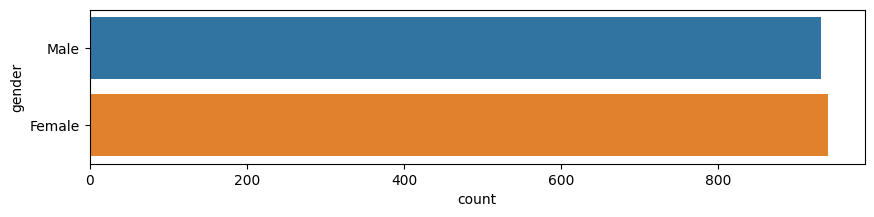

In [121]:
plt.figure(figsize=(10,2))
sns.countplot(y=df_churner.gender,data=df_churner)

In [122]:
df_churner.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332
std,0.435799,19.531123,24.666053
min,0.000000,1.000000,18.850000
25%,0.000000,2.000000,56.150000
50%,0.000000,10.000000,79.650000
75%,1.000000,29.000000,94.200000
max,1.000000,72.000000,118.350000


In [123]:
cluster_2d = df_churner.loc[:,['tenure','MonthlyCharges']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(cluster_2d)
    wcss.append(kmeans.inertia_)

C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

Text(0, 0.5, 'wcss')

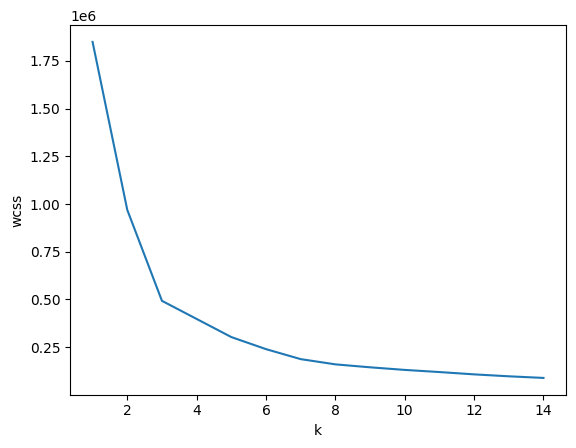

In [124]:
# Elbow graph
plt.plot(range(1,15),wcss)
plt.xlabel('k')
plt.ylabel('wcss')

C:\Users\sandeep sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


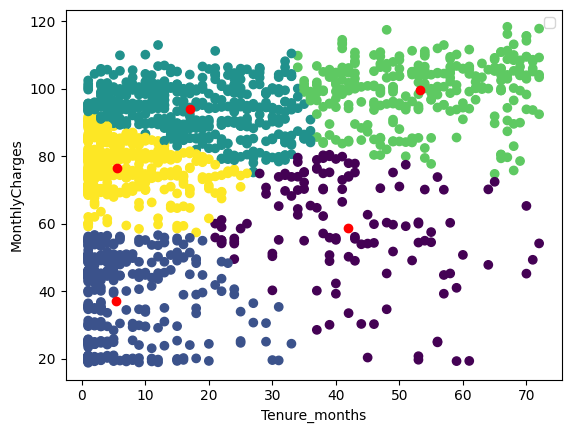

In [126]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(cluster_2d)
plt.scatter(cluster_2d[:,0],cluster_2d[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.xlabel('Tenure_months')
plt.ylabel('MonthlyCharges')
plt.legend()